<a href="https://colab.research.google.com/github/PN1019/Hiring-Challenges-Exercises/blob/main/ALLTech/ExchangeRateAnalysisSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1

* Imported the JSON file(orders.json) in python pandas and perform all the data cleaning and manipulation ; 
* Export the currency data from the provided API (https://exchangeratesapi.io/) 

* Create the final required output file;



In [ ]:
# Import required libraries

import pandas as pd
import requests
import json


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving orders.json to orders.json


In [ ]:
# Import the data provided for the task
df_data = pd.read_json('orders.json')
df_data.head()


,id,customer,total_price,created_at,line_items
0,8369263756632563,"{'id': 47178, 'name': 'William Doe', 'email': ...",79.39,2020-03-07 14:31:11+00:00,"[{'id': 610448, 'product_id': 632910392, 'prod..."
1,7262170348080494,"{'id': 94720, 'name': 'Emile Tumson', 'email':...",86.98,2020-03-01 09:16:30+00:00,"[{'id': 997208, 'product_id': 278266679, 'prod..."
2,7722055557038194,"{'id': 59933, 'name': 'Ethan Jones', 'email': ...",36.99,2020-01-01 09:17:03+00:00,"[{'id': 759658, 'product_id': 573794972, 'prod..."
3,4280852170163518,"{'id': 23955, 'name': 'Daniel Smith', 'email':...",55.98,2020-03-10 11:59:46+00:00,"[{'id': 317808, 'product_id': 477365777, 'prod..."
4,5058732129957127,"{'id': 59933, 'name': 'Ethan Jones', 'email': ...",309.98,2020-03-15 07:27:24+00:00,"[{'id': 604665, 'product_id': 510650809, 'prod..."


In [ ]:
# Rename the column id to Order_id
df_data = df_data.rename(columns = {'id':'Order_id' })


In [ ]:
# Convert the dictionaries of customer into separate columns
df_data = pd.concat([df_data.drop(['customer'], axis=1), df_data['customer'].apply(pd.Series)], axis=1)
df_data.head()


,Order_id,total_price,created_at,line_items,id,name,email
0,8369263756632563,79.39,2020-03-07 14:31:11+00:00,"[{'id': 610448, 'product_id': 632910392, 'prod...",47178,William Doe,william.doe@gmail.com
1,7262170348080494,86.98,2020-03-01 09:16:30+00:00,"[{'id': 997208, 'product_id': 278266679, 'prod...",94720,Emile Tumson,emile.tumson@gmail.com
2,7722055557038194,36.99,2020-01-01 09:17:03+00:00,"[{'id': 759658, 'product_id': 573794972, 'prod...",59933,Ethan Jones,ethan.jones@gmail.com
3,4280852170163518,55.98,2020-03-10 11:59:46+00:00,"[{'id': 317808, 'product_id': 477365777, 'prod...",23955,Daniel Smith,daniel.smith@gmail.com
4,5058732129957127,309.98,2020-03-15 07:27:24+00:00,"[{'id': 604665, 'product_id': 510650809, 'prod...",59933,Ethan Jones,ethan.jones@gmail.com


In [ ]:
# Rename the newly created columns
df_data = df_data.rename(columns = {'id':'customer_id','name':'customer_name' })


In [ ]:
# Convert the dictionaries of line_items into separate columns
df_data = pd.concat([df_data.drop(['line_items'], axis=1), df_data['line_items'].apply(pd.Series)], axis=1)
df_data = df_data.drop([1, 2,3], axis=1)
df_data = df_data.rename(columns = {0:'line_items'})
df_data = pd.concat([df_data.drop(['line_items'], axis=1), df_data['line_items'].apply(pd.Series)], axis=1)
df_data = df_data.rename(columns = {'price':'product_price'})
df_data.head()


,Order_id,total_price,created_at,customer_id,customer_name,email,id,product_id,product_sku,product_name,product_price
0,8369263756632563,79.39,2020-03-07 14:31:11+00:00,47178,William Doe,william.doe@gmail.com,610448,632910392,PPLEPUNCH20-05,Purple Punch 2.0 Dried Flower,29.40
1,7262170348080494,86.98,2020-03-01 09:16:30+00:00,94720,Emile Tumson,emile.tumson@gmail.com,997208,278266679,GPSTASH-01,Grandpa's Stash Dried Flower,49.99
2,7722055557038194,36.99,2020-01-01 09:17:03+00:00,59933,Ethan Jones,ethan.jones@gmail.com,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99
3,4280852170163518,55.98,2020-03-10 11:59:46+00:00,23955,Daniel Smith,daniel.smith@gmail.com,317808,477365777,GOGPR-07,Glueberry OG Pre-Rolls,5.99
4,5058732129957127,309.98,2020-03-15 07:27:24+00:00,59933,Ethan Jones,ethan.jones@gmail.com,604665,510650809,PAX-3,Pax 3 Vaporizer,259.99


###  Exporting Currency Data from API

In [ ]:
# Get the data from URL
r = requests.get('http://api.exchangeratesapi.io/v1/2020-01-01?access_key=#ACCESS_KEY_CREDENTIALS&symbols=CAD')
#under free subscription I don't have access to conversion API for currency base and end date so using api data for which I have access currently
x = r.json()
df = pd.read_json(json.dumps(x))
df.head()

#Above API Link is giving me access to "historical"endpoint- request historical rates for a specific day for base EUR by deafault
# after u have access to conversion api u just need to change the access link to this
#http://api.exchangeratesapi.io/v1/timeseries?access_key=##ACCESS_KEY_CREDENTIALS&start_date=2020-01-01&end_date=2020-04-01&base=USD&symbols=CAD&format=1

,success,timestamp,historical,base,date,rates
CAD,True,2020-01-01 23:59:59,True,EUR,2020-01-01,1.45563


If we have used this #http://api.exchangeratesapi.io/v1/timeseries?access_key=##ACCESS_KEY_CREDENTIALS&start_date=2020-01-01&end_date=2020-04-01&base=USD&symbols=CAD&format=1
below image shows the resultant response to request
we have to perform data manipulation according to data provided by API Request.

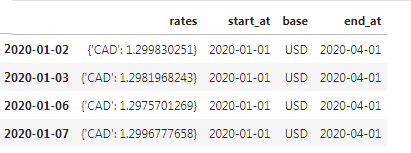

In [ ]:
# Deleting the non required columns
df = df.drop(df.columns[[0,1,2,3]], axis=1) 
df.head()


,date,rates
CAD,2020-01-01,1.45563


In [ ]:
## Convert the rate column into general columns and rename it
#df = pd.concat([df.drop(['rates'], axis=1), df['rates'].apply(pd.Series)], axis=1)
df = df.rename(columns = {'rates':'CAD_rate'})
df.head()


,date,CAD_rate
CAD,2020-01-01,1.45563


In [ ]:
df_data['date'] = df_data['created_at']
df_data['date'] = df_data['date'].dt.date
df_data.head()


,Order_id,total_price,created_at,customer_id,customer_name,email,id,product_id,product_sku,product_name,product_price,date
0,8369263756632563,79.39,2020-03-07 14:31:11+00:00,47178,William Doe,william.doe@gmail.com,610448,632910392,PPLEPUNCH20-05,Purple Punch 2.0 Dried Flower,29.40,2020-03-07
1,7262170348080494,86.98,2020-03-01 09:16:30+00:00,94720,Emile Tumson,emile.tumson@gmail.com,997208,278266679,GPSTASH-01,Grandpa's Stash Dried Flower,49.99,2020-03-01
2,7722055557038194,36.99,2020-01-01 09:17:03+00:00,59933,Ethan Jones,ethan.jones@gmail.com,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99,2020-01-01
3,4280852170163518,55.98,2020-03-10 11:59:46+00:00,23955,Daniel Smith,daniel.smith@gmail.com,317808,477365777,GOGPR-07,Glueberry OG Pre-Rolls,5.99,2020-03-10
4,5058732129957127,309.98,2020-03-15 07:27:24+00:00,59933,Ethan Jones,ethan.jones@gmail.com,604665,510650809,PAX-3,Pax 3 Vaporizer,259.99,2020-03-15


In [ ]:
# format the date column in the other file
df['date'] = df['date'].dt.date


In [ ]:
# merging the files to get the CAD rate in the main file
df_data = pd.merge(df_data,df,on = 'date')
df_data.head()


,Order_id,total_price,created_at,customer_id,customer_name,email,id,product_id,product_sku,product_name,product_price,date,CAD_rate
0,7722055557038194,36.99,2020-01-01 09:17:03+00:00,59933,Ethan Jones,ethan.jones@gmail.com,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99,2020-01-01,1.45563
1,5825547264855968,55.98,2020-01-01 12:59:26+00:00,59933,Ethan Jones,ethan.jones@gmail.com,771854,694165761,HYBTINC-03,Hybrid Blend THC Tincture,49.99,2020-01-01,1.45563


In [ ]:
# convert the original order price and the product price to CAD
df_data['order_price_CAD'] = df_data['total_price']*df_data['CAD_rate']
df_data['product_price_CAD'] = df_data['product_price']*df_data['CAD_rate']
df_data.head()


,Order_id,total_price,created_at,customer_id,customer_name,email,id,product_id,product_sku,product_name,product_price,date,CAD_rate,order_price_CAD,product_price_CAD
0,7722055557038194,36.99,2020-01-01 09:17:03+00:00,59933,Ethan Jones,ethan.jones@gmail.com,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99,2020-01-01,1.45563,53.843754,53.843754
1,5825547264855968,55.98,2020-01-01 12:59:26+00:00,59933,Ethan Jones,ethan.jones@gmail.com,771854,694165761,HYBTINC-03,Hybrid Blend THC Tincture,49.99,2020-01-01,1.45563,81.486167,72.766944


In [ ]:
# round the decimal places
df_data = df_data.round({'order_price_CAD': 2, 'product_price_CAD': 2})
df_data.head()


,Order_id,total_price,created_at,customer_id,customer_name,email,id,product_id,product_sku,product_name,product_price,date,CAD_rate,order_price_CAD,product_price_CAD
0,7722055557038194,36.99,2020-01-01 09:17:03+00:00,59933,Ethan Jones,ethan.jones@gmail.com,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99,2020-01-01,1.45563,53.84,53.84
1,5825547264855968,55.98,2020-01-01 12:59:26+00:00,59933,Ethan Jones,ethan.jones@gmail.com,771854,694165761,HYBTINC-03,Hybrid Blend THC Tincture,49.99,2020-01-01,1.45563,81.49,72.77


In [ ]:
# a summary file with Order_id and the final price
data_Order =df_data[['Order_id','order_price_CAD']]


### Required Output stored in CSV Files

In [ ]:
df_data.to_csv('Output\data.csv',index = False)
data_Order.to_csv('Output\data_order.csv',index = False)


# TASK 2
* Persist the data obtained from task 1;
* Upload your data to a SQL database of your choice (SQLite, MySQL, PostgreSQL.);
* Design the right data model for your data Create the SQL tables Import your 
data in SQL;
* Write SQL statements to create tables for the data ;
* Write A Python script to upload the data (or the one from Task 1, extended);


In [ ]:
# Get the columns of data so that same structured table can be created in SQL
df_data.columns


Index(['Order_id', 'total_price', 'created_at', 'customer_id', 'customer_name',
       'email', 'id', 'product_id', 'product_sku', 'product_name',
       'product_price', 'date', 'CAD_rate', 'order_price_CAD',
       'product_price_CAD'],
      dtype='object')

In [ ]:
# formatting the date column
df_data['date'] =df_data['date'].astype('datetime64[ns]')


In [1]:
!pip install pyodbc

     |████████████████████████████████| 280 kB 5.1 MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.32-cp37-cp37m-linux_x86_64.whl size=287275 sha256=2fe386dff726c3b1a175863d07d22783076e89ad8759f86b1ec291cbba4904ca
  Stored in directory: /root/.cache/pip/wheels/2e/9c/da/8652fd42e0f662015554f00a9e96fe4f438dfd1ef59787879e
Successfully built pyodbc


In [14]:
#code to install the Microsoft ODBC driver 17 from the bash shell for ubuntu
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/21.04/prod.list > /etc/apt/sources.list.d/mssql-release.list

sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17


OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://packages.microsoft.com/ubuntu/21.04/prod hirsute InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubun

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   4349      0 --:--:-- --:--:-- --:--:--  4349
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    90  100    90    0     0    909      0 --:--:-- --:--:-- --:--:--   909


In [15]:
pyodbc.drivers()

['ODBC Driver 17 for SQL Server']

# NOTE: 
# Perhaps below code for connecting python to sqlserver will not run on Google Collab due to the specialty of its work,you will need to download this code and run it on your local ide by putting up system specification details.

# SQL Queries for Creation and Retrival of data
### Creation of Order Table:
create table order_table (
             Order_id varchar(30) PRIMARY KEY, total_price money,
			 created_at DateTime, date DateTime,
			 CAD_rate money, order_price_CAD money
			 )
	  
select *
from order_table

### Creation of Customer Table:
create table customer_table(
             Order_id varchar(30) FOREIGN KEY REFERENCES order_table(Order_id),
			 customer_id varchar(30),
			 customer_name varchar(50), email varchar(30)
			 )

select *
from customer_table
### Creation of Product Table:
create table product_table(
             Order_id varchar(30) FOREIGN KEY REFERENCES order_table(Order_id),
			 id varchar(30), product_id varchar(30), product_sku varchar(30),
			 product_name varchar(50), product_price money,
			 date DateTime, CAD_rate money, product_price_CAD money
			 )

select *
from product_table


In [ ]:
#connecting python to sql-server database using pyodbc 
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=your_server_name;'
                      'Database=test_database;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute('SELECT * FROM test_database.dbo.order_table')
 
# Insert DataFrame to Table(order_table)
for row in data.itertuples():
    cursor.execute('''
                INSERT INTO test_database.dbo.order_table (Order_id,total_price,created_at,date,CAD_rate,order_price_CAD)
                VALUES (?,?,?,?,?,?)
                ''',
                
                row.Order_id,
                row.total_price,
                row.created_at,
                row.date,
                row.CAD_rate,
                row.order_price_CAD
                        
                )
conn.commit()


In [ ]:
#connecting python to sql-server database using pyodbc 
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=your_server_name;'
                      'Database=test_database;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute('SELECT * FROM test_database.dbo.customer_table')
 
# Insert DataFrame to Table(customer_table)
for row in data.itertuples():
    cursor.execute('''
                INSERT INTO test_database.dbo.customer_table (Order_id,customer_id,customer_name,email)
                VALUES (?,?,?,?)
                ''',
                
                row.Order_id,
                row.customer_id,
                row.customer_name,
                row.email
                        
                )
conn.commit()
    

In [ ]:
# connecting python to sql-server database using pyodbc 
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=your_server_name;'
                      'Database=test_database;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute('SELECT * FROM test_database.dbo.product_table')
 
# Insert DataFrame to Table(product_table)
for row in data.itertuples():
    cursor.execute('''
                INSERT INTO test_database.dbo.product_table (Order_id,id,product_id,product_sku,product_name,
                                                                           product_price,date,CAD_rate,product_price_CAD)
                VALUES (?,?,?,?,?,?,?,?,?)
                ''',
                
                row.Order_id,
                row.id,
                row.product_id,
                row.product_sku,
                row.product_name,
                row.product_price,
                row.date,
                row.CAD_rate,
                row.product_price_CAD
                        
                )
conn.commit()


### TASK 3
Create visualizations/Dashboard to analyze the data from task1.

*Note: I have used sample data instead of data obtained above due to insufficient data.*

Solution Present on  [tableau public](https://public.tableau.com/authoring/ExchangeRateAnalysis_16371482082830/CustomersVsProductVSProductPrice#1) 